## SVD разложение

Сингулярное разложение - способ представить исходную матрицу в виде произведения 3х других:
$$X = U \Sigma V^{T}$$
, где U - ортогональная матрица, $\Sigma$ - диагональная, а V - ортогональная матрица. \
Если X – матрица большого размера $N*M$, но малого ранга f (в частности, разреженные матрицы часто бывают малого ранга), её можно разложить в произведение матрицы $M*f$ и матрицы $f*N$, тем самым резко сократив число параметров, c NM до (N+M)f. \
Основное же свойство SVD – в том, что SVD даёт оптимальное такое приближение, если в матрице D просто оставить ровно f первых диагональных элементов, а остальные занулить:
$$X = U \Sigma V^{T} = U
\left(
\begin{array}{cccc}
\sigma_{1} & 0 & \ldots & 0\\
0 & \sigma_2 & \ldots &0\\
\vdots & \vdots &  & \vdots\\
0 & 0 & \ldots & \sigma_{n}
\end{array}
\right)V^{T} = U
\left(
\begin{array}{cccccc}
\sigma_{1} & \ldots & 0 & 0 &\ldots & 0\\
\vdots & & \vdots & \vdots & & \vdots\\
0 & \ldots & \sigma_{f} & 0 &\ldots & 0\\
0 & \ldots & 0 & 0 &\ldots & 0\\
\vdots & & \vdots & \vdots & & \vdots\\
0 & \ldots & 0 & 0 &\ldots & 0\\
\end{array}
\right)V^{T}
$$
В диагональной матрице D, которая в середине сингулярного разложения, элементы упорядочены по размеру, так что обнулить последние элементы – это значит обнулить наименьшие элементы.

## Применение SVD

SVD имеет очень широкое распространение в рекомендательных системах. \
В случае рекомендательных систем получается, что мы представляем каждого пользователя вектором из f факторов $u_i$ и представляем каждый продукт вектором из f факторов $v_j$, а потом, чтобы предсказать рейтинг пользователя i товару j, берём их скалярное произведение $u_i^T*v_j$. Можно сказать, что вектор факторов пользователя показывает, насколько пользователю нравится или не нравится тот или иной фактор, а вектор факторов продукта показывает, насколько тот или иной фактор в продукте выражен. Линейная же алгебра подсказывает нам, что для разреженной матрицы рейтингов такое разложение часто возможно и имеет содержательный смысл. \
Может оказаться, кстати, что некоторые факторы легко будет понять человеческим умом: для фильмов может выделиться что-нибудь в духе «комедия–драма», «доля action'а», «доля романтики» и т.п., а факторы пользователей, соответственно, будут показывать, насколько соответствующие характеристики фильма им по вкусу. Но может и не выделиться ничего содержательного – тут гарантий нет, формально мы просто жонглируем цифрами. \
Также классический пример применения SVD – шумоподавление, например, в изображениях. 

## Пример решения задачи

Выполним задачу компрессии изображения кота с помощью метода SVD, а также попробуем параметризовать эту компрессию

In [1]:
#импортируем функции
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

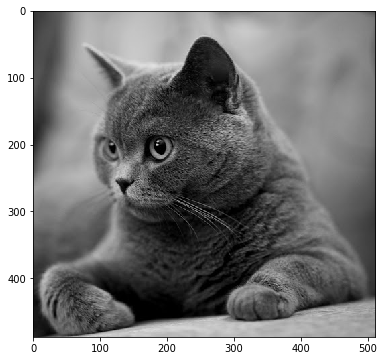

In [2]:
#демонстрируем изображение
img = Image.open('cat.jpg')
plt.figure(figsize=(9, 6))
plt.imshow(img)

In [3]:
#находим матрицу и демонстрируем ее без компрессии
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

NameError: name 'imggray' is not defined

In [ ]:
#найдем все элементы разложения
U, Sigma, V = np.linalg.svd(imgmat)

In [ ]:
#продемонстрируем зависимость качества изображения от параметра f
for i in range(5, 121, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "f = %s" % i
    plt.title(title)
    plt.show()